In [1]:
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

# replicate Meshal's pretty plotting colors
from matplotlib import colors
gray_red = colors.LinearSegmentedColormap.from_list("grouping", ["lightgray", "red", "darkred"], N = 128)

from utils import enrich

sc.set_figure_params(dpi=100, frameon=False)

In [2]:
adata = sc.read('2212_annot_patient_integrated.h5ad')

/home/yuge/miniconda3/envs/fa_base/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


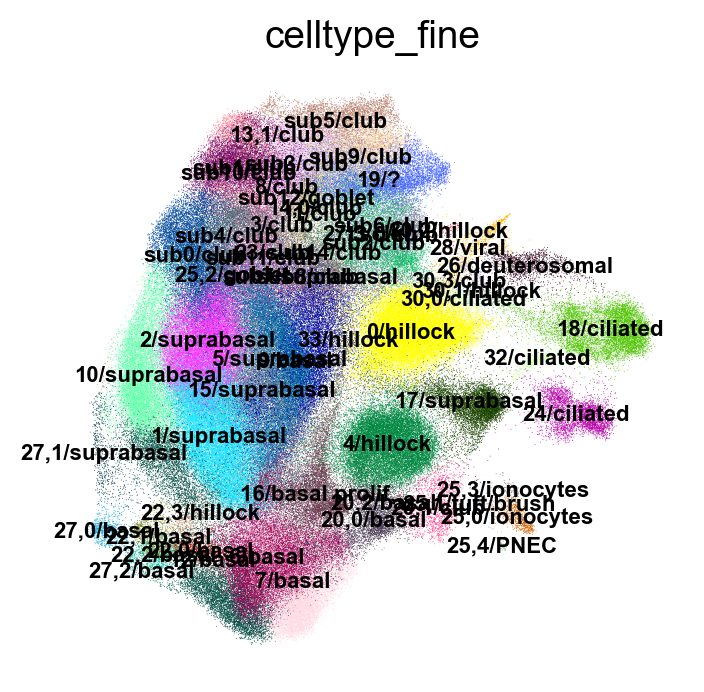

In [3]:
sc.pl.umap(adata, color='celltype_fine', legend_loc='on data', legend_fontsize=8)

/home/yuge/miniconda3/envs/fa_base/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


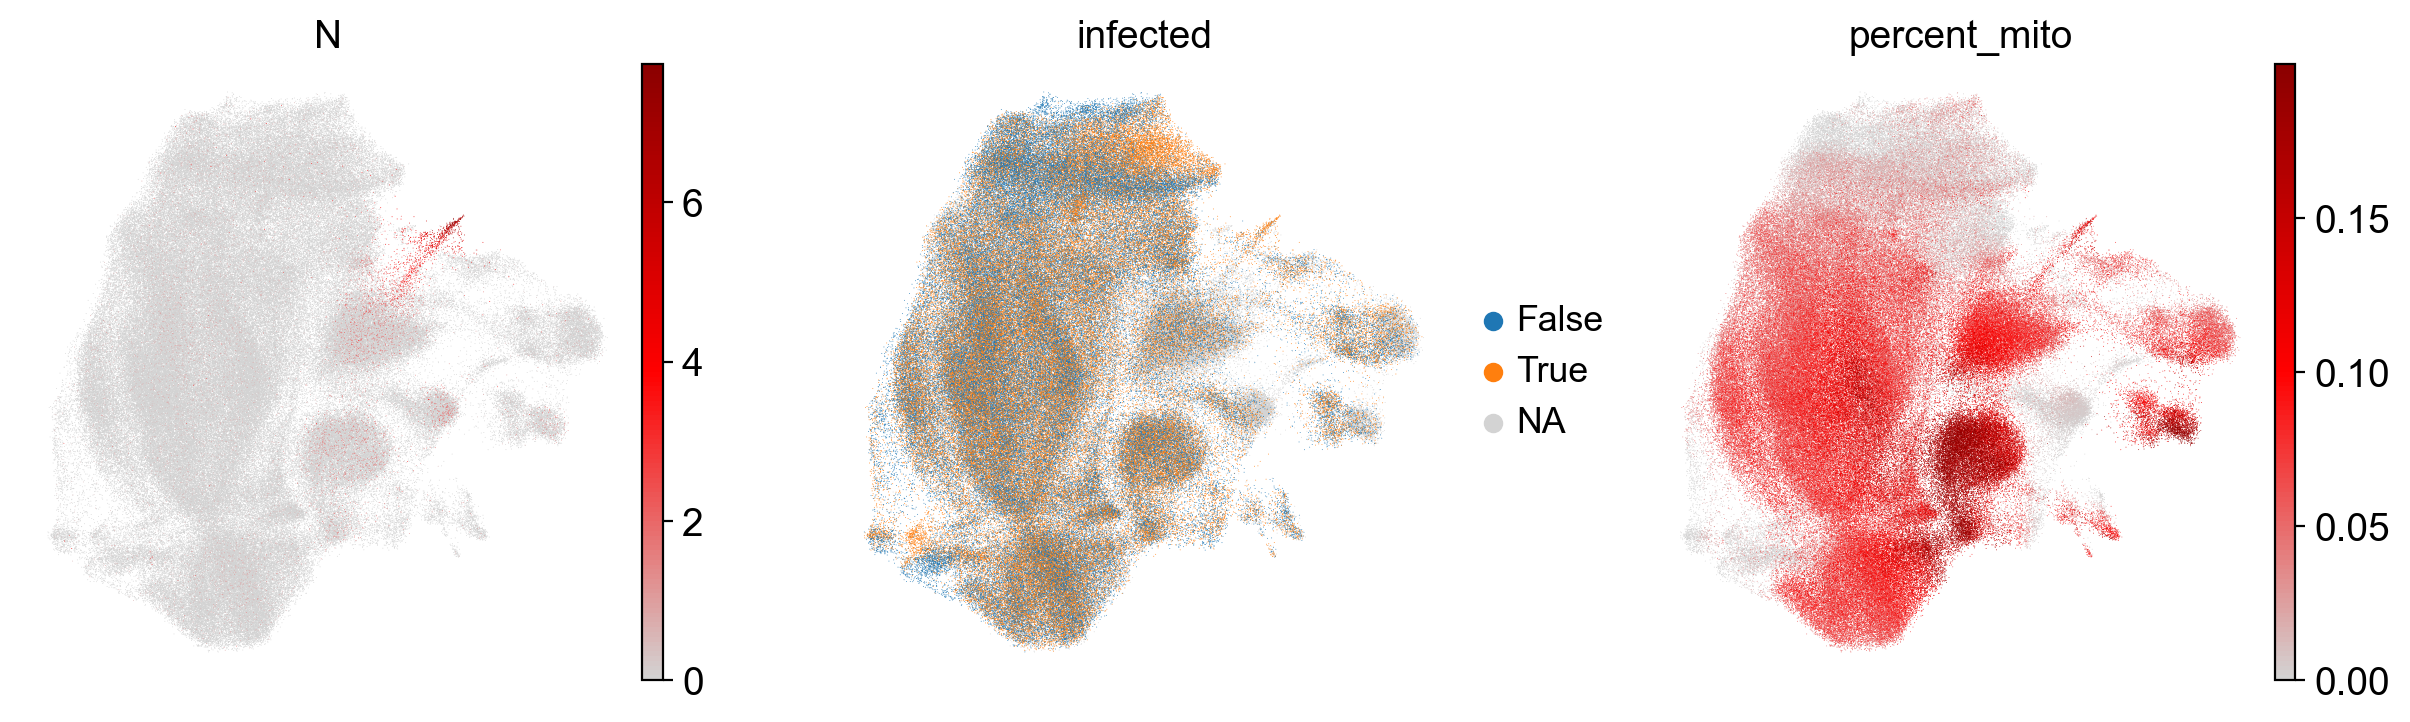

In [4]:
sc.pl.umap(adata[adata.obs.celltype_fine != '40/viral'], color=['N', 'infected', 'percent_mito'], cmap=gray_red)

In [5]:
new_adata = adata[adata.obs.percent_mito < .1].copy()

In [6]:
sc.pp.neighbors(new_adata, use_rep='X_scVI')

In [7]:
sc.tl.umap(new_adata)

/home/yuge/miniconda3/envs/fa_base/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yuge/miniconda3/envs/fa_base/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


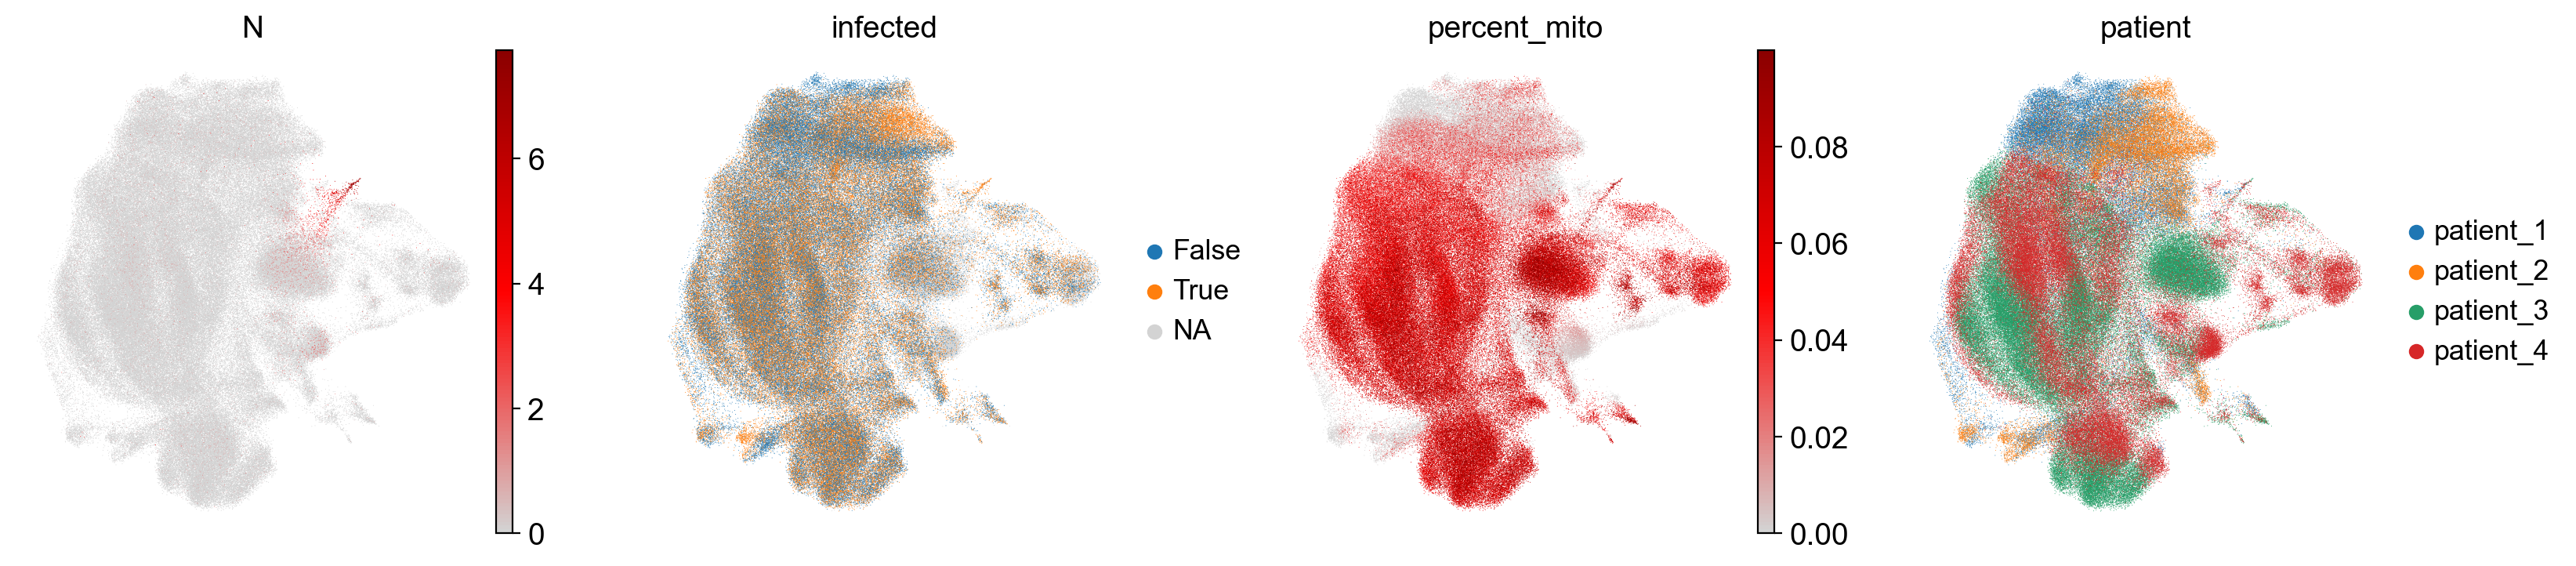

In [8]:
sc.pl.umap(new_adata, color=['N', 'infected', 'percent_mito', 'patient'], cmap=gray_red)

/home/yuge/miniconda3/envs/fa_base/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


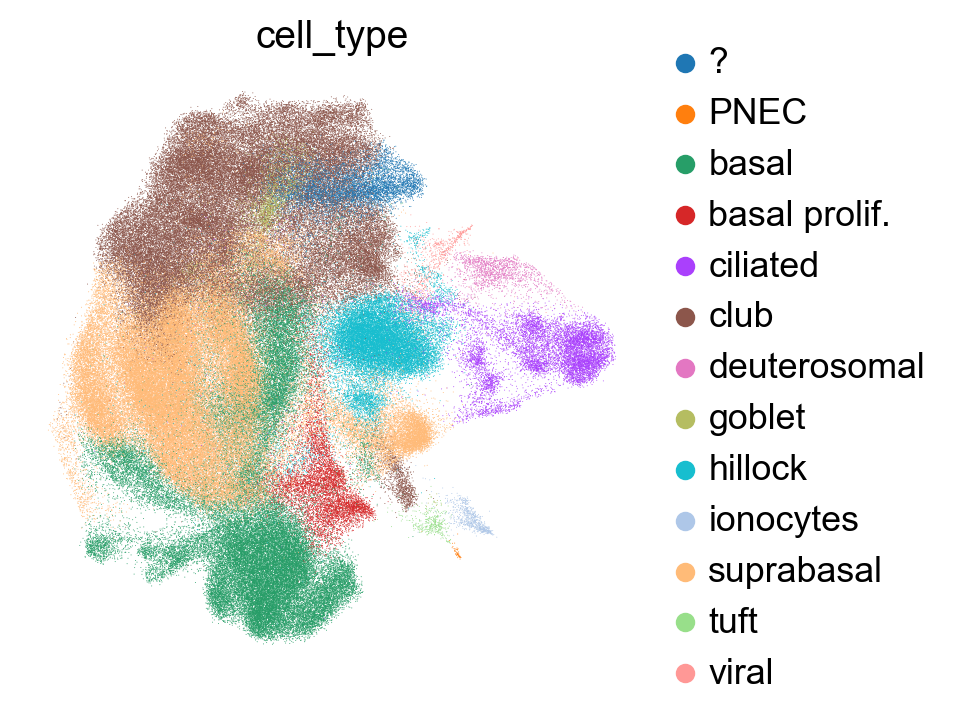

In [11]:
sc.pl.umap(new_adata, color='cell_type')

In [10]:
new_adata.write('2301_annot_patient_integrated.h5ad')

Remove ambient clusters.

In [13]:
adata = new_adata.copy()

In [14]:
subset = adata[adata.obs.treatment != 'nan'].copy()

In [16]:
import seaborn as sns

/home/yuge/miniconda3/envs/fa_base/lib/python3.8/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot: >

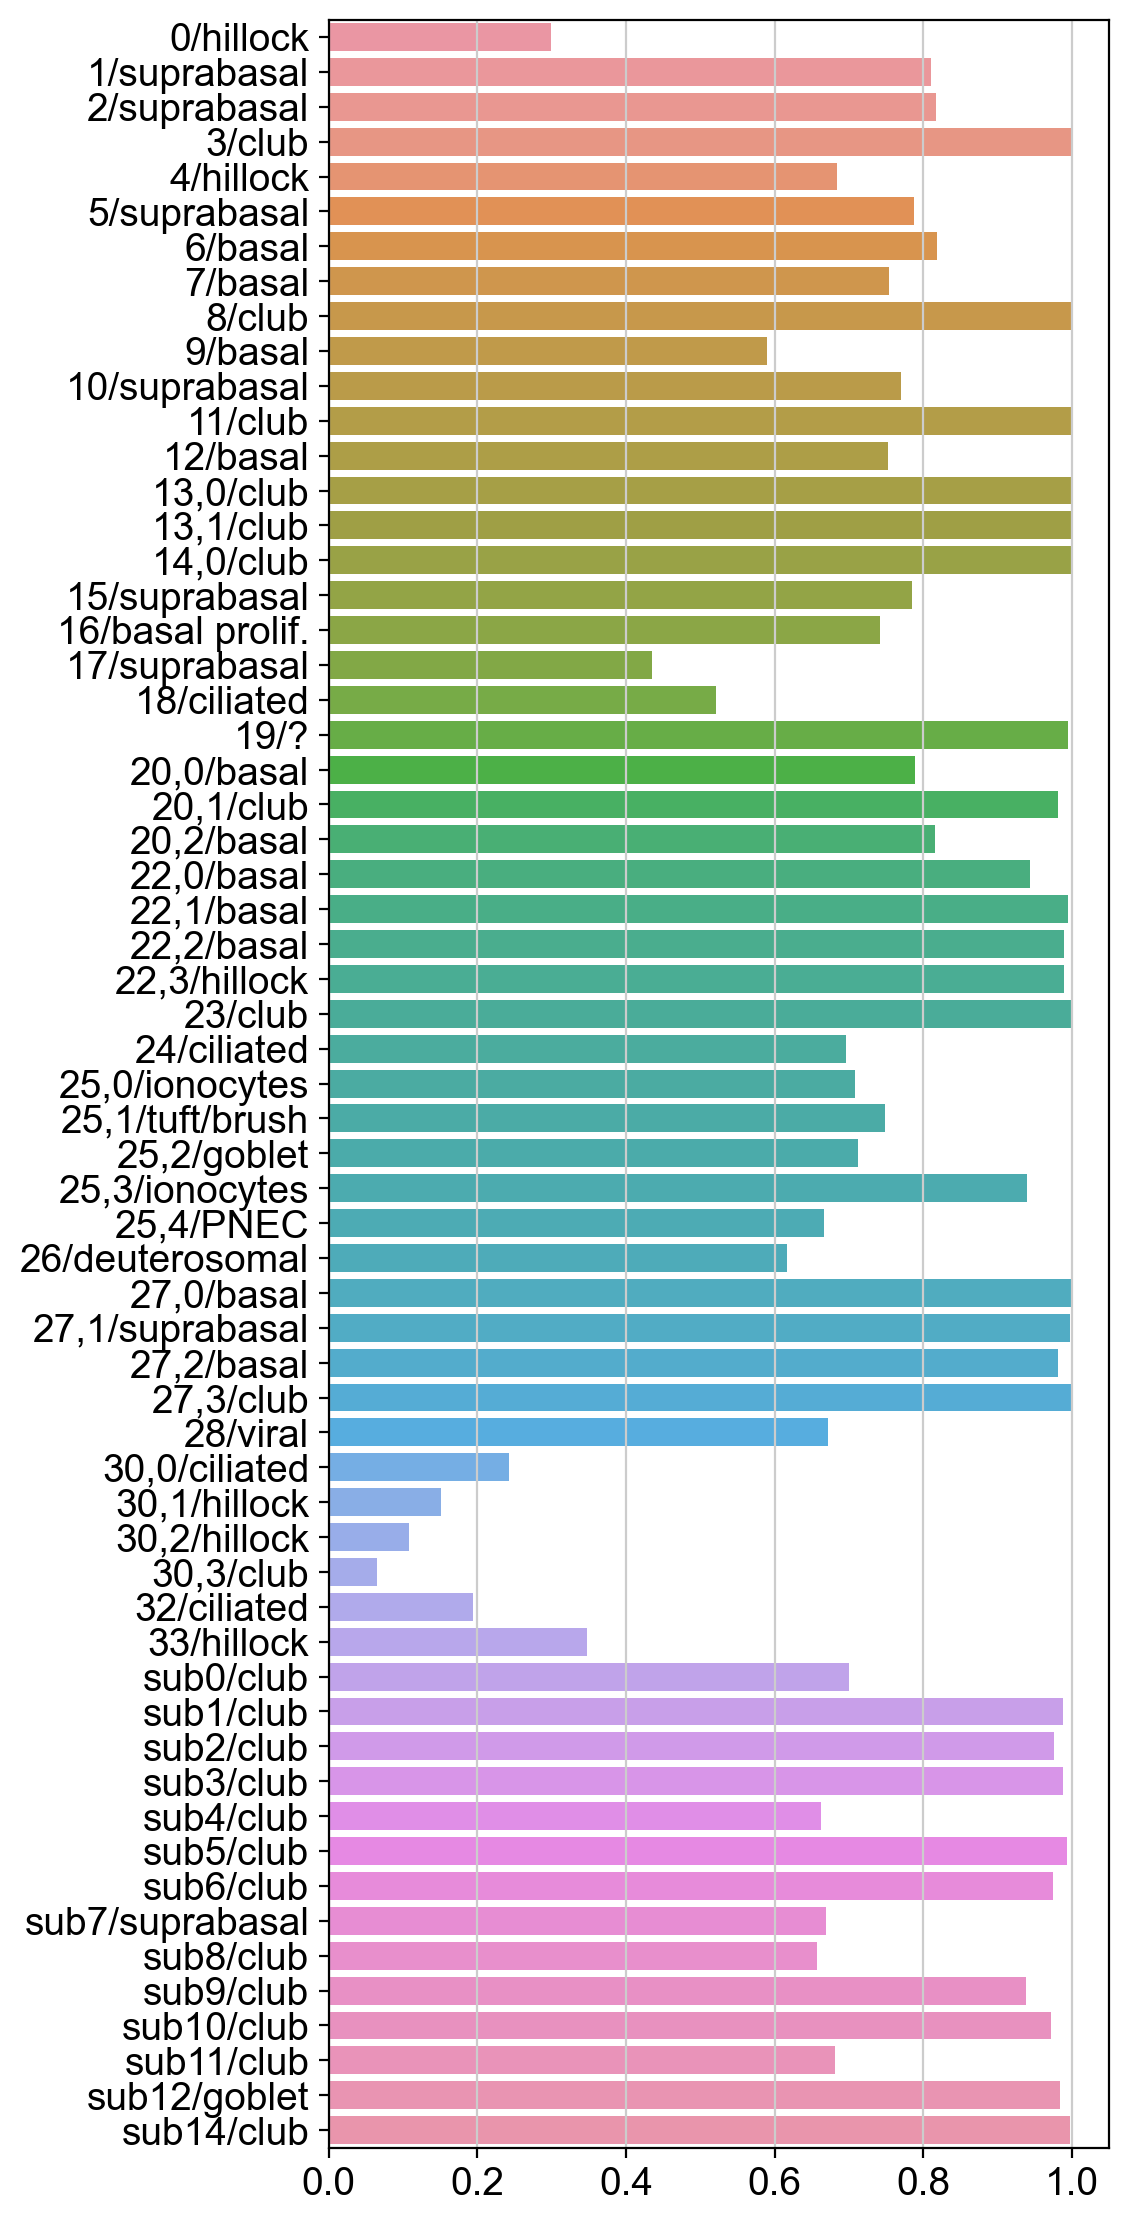

In [18]:
freq_df = pd.DataFrame(subset.obs.celltype_fine.value_counts()[subset.obs.celltype_fine.cat.categories]/adata.obs.celltype_fine.value_counts()[subset.obs.celltype_fine.cat.categories])
plt.figure(figsize=(5, 14))
sns.barplot(freq_df.T, orient='h')

/tmp/ipykernel_2472129/2748341081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs['ambient'][adata.obs.celltype_fine.isin(freq_df.index[(freq_df.celltype_fine < .5)].tolist())] = 'True'
/home/yuge/miniconda3/envs/fa_base/lib/python3.8/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/yuge/miniconda3/envs/fa_base/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


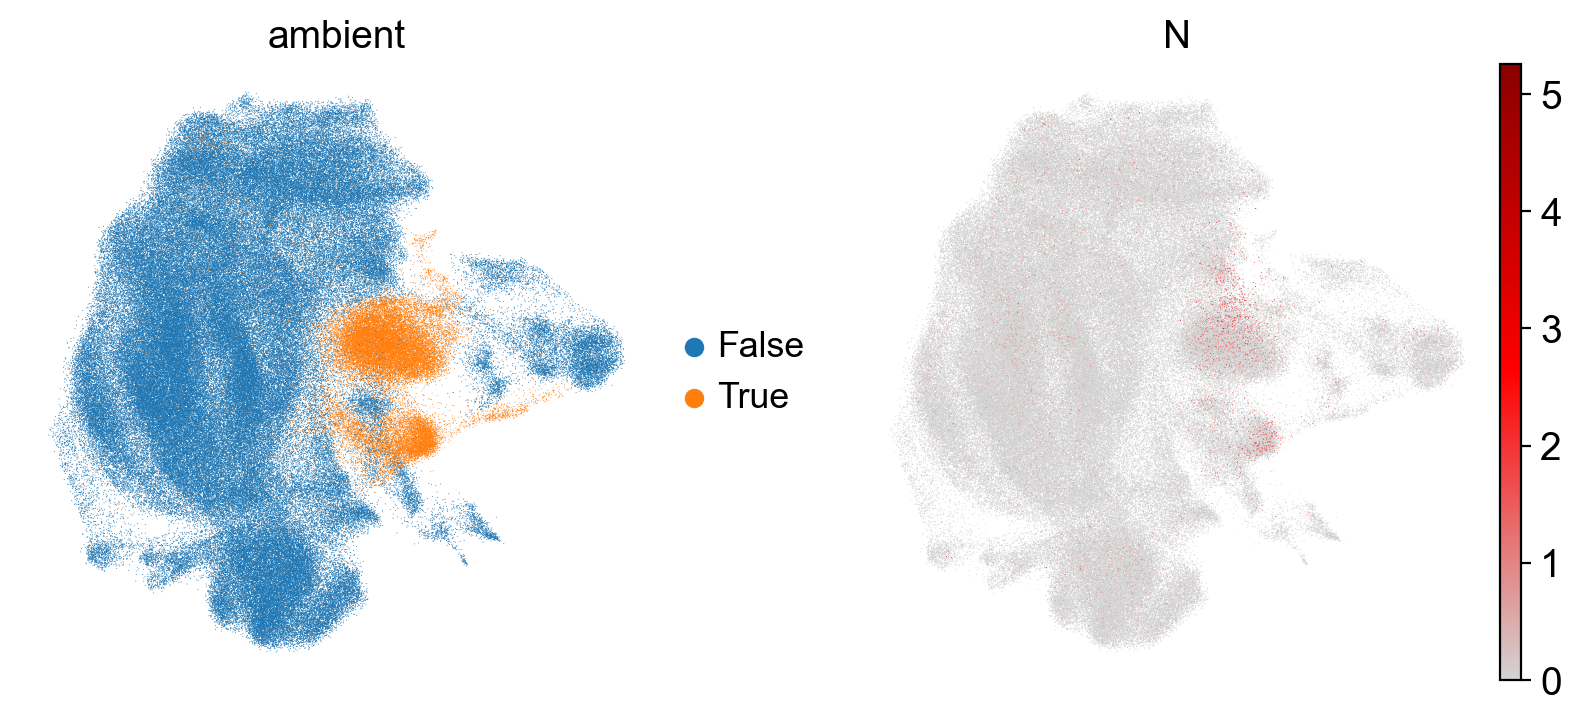

In [22]:
adata.obs['ambient'] = 'False'
adata.obs['ambient'][adata.obs.celltype_fine.isin(freq_df.index[(freq_df.celltype_fine < .5)].tolist())] = 'True'
sc.pl.umap(adata[adata.obs.cell_type != 'viral'], color=['ambient', 'N'], cmap=gray_red)

In [23]:
adata[adata.obs.ambient == 'False'].write('2301_annot_patient_integrated_ambient_removed.h5ad')

/home/yuge/miniconda3/envs/fa_base/lib/python3.8/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


/home/yuge/miniconda3/envs/fa_base/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


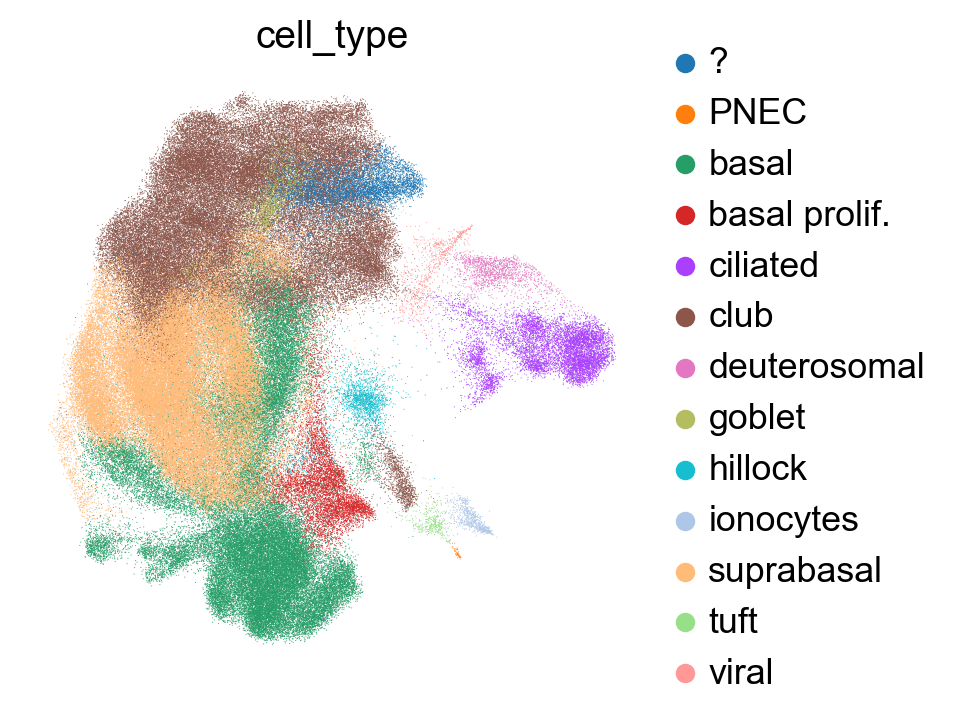

In [24]:
sc.pl.umap(adata[adata.obs.ambient == 'False'], color='cell_type')

In [25]:
adata = adata[adata.obs.ambient == 'False'].copy()

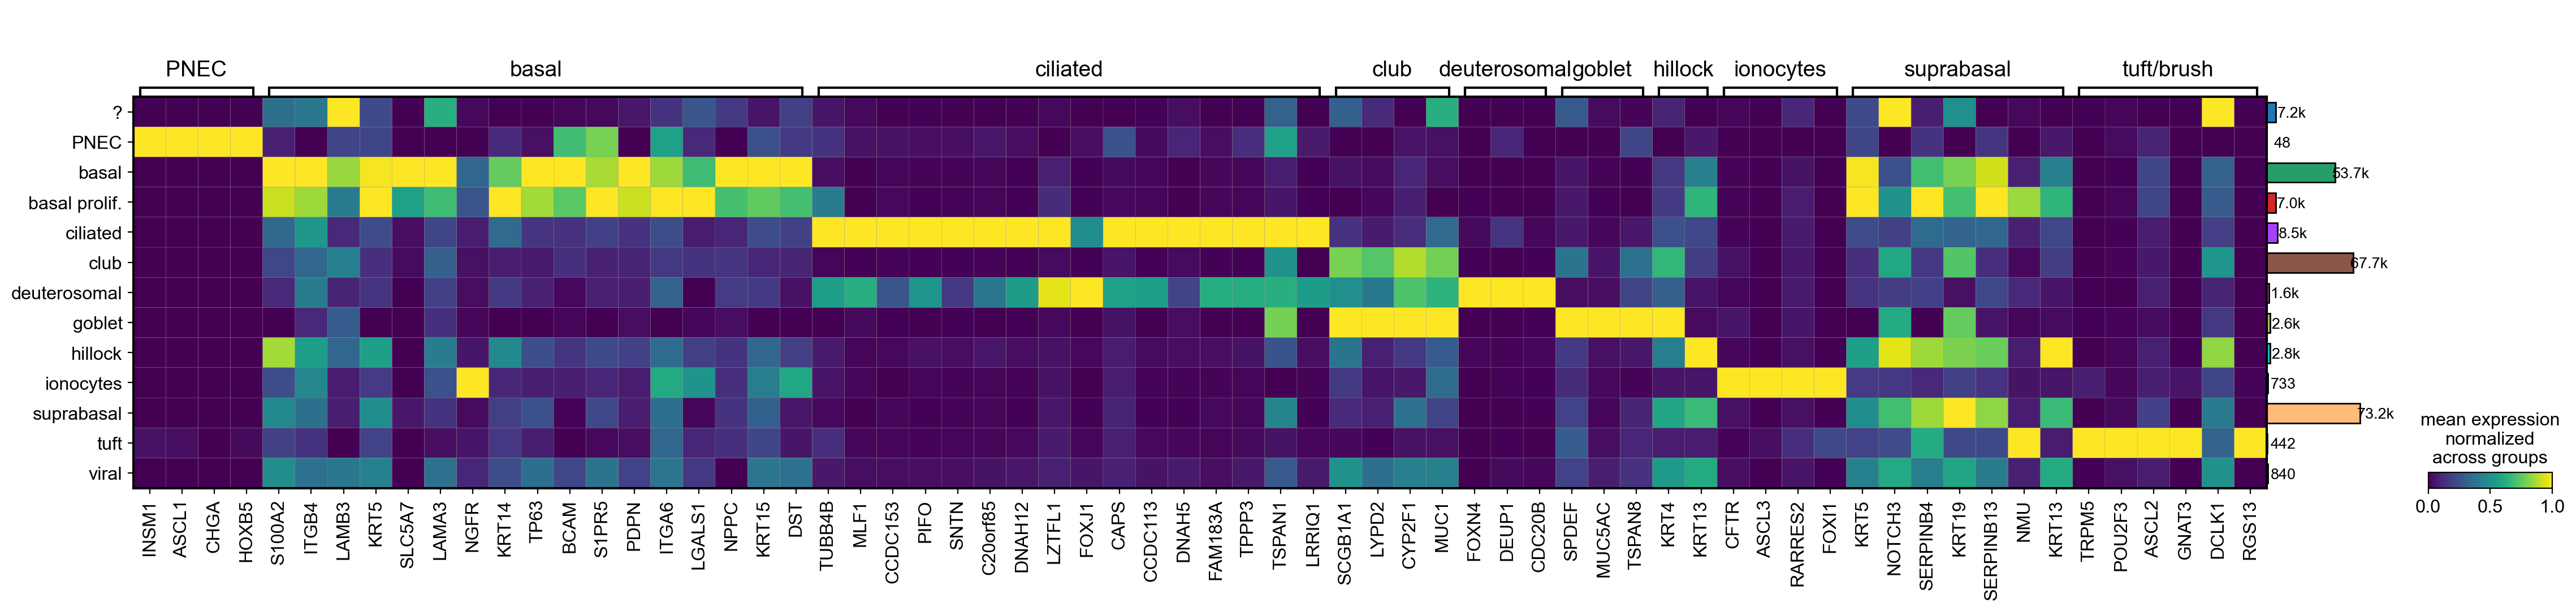

In [34]:
# markers_fine = {
# #     'at1, at2': ['RTKN2', 'AGER', 'NCKAP5', 'SFTPC'],
#     'Basal': ['KRT15', 'TP63', 'S1PR5', 'SLC5A7'],
#     'Ciliated': ['FOXJ1', 'CCDC153', 'CCDC113', 'MLF1', 'LZTFL1'],
#     'Club': ['SCGB1A1', 'LYPD2', 'MUC1', 'CYP2F1'],
#     'Goblet': ['MUC5AC', 'MUC5B', 'TSPAN8', 'SPDEF'],
#     'Ionocytes': ['FOXI1', 'CFTR', 'ASCL3'],
#     'Suprabasal': ['KRT5', 'SERPINB4', 'KRT13', 'NMU', 'SERPINB13'],
#     'Hillock': ['KRT5', 'KRT13'],
# #     'viral':[]
#     'Brush': ['POU2F3', 'AVIL', 'GNAT3', 'TRPM5', 'RGS13'],
# }

markers_fine = {
    'PNEC': ['ASCL1', 'CHGA', 'CGRP', 'INSM1', 'HOXB5'],
    'basal': ['KRT5', 'TP63', 'KRT14', 'PDPN', 'NGFR',
              'LGALS1', 'ITGA6', 'ITGB4', 'LAMA3', 'LAMB3',
              'KRT15', 'S100A2', 'NPPC', 'BCAM', 'DST',
              'S1PR5', 'SLC5A7'],  # HLCA
    'ciliated': ['FOXJ1', 'PIFO', 'TPPP3', 'SNTN', 'FAM183A',
                 'LRRIQ1', 'DNAH12', 'C20orf85', 'SNTN', 'CAPS',
                 'TUBB4B', 'DNAH5', 'TSPAN1',
                 'CCDC153', 'CCDC113', 'MLF1', 'LZTFL1'],  # HLCA
    'club': ['SCGB1A1', 'LYPD2', 'MUC1', 'CYP2F1'],
    'deuterosomal':['DEUP1', 'CCDC67', 'FOXN4', 'CDC20B'],
    'goblet': ['MUC5AC', 'TSPAN8', 'SPDEF'],
    'hillock': ['KRT13', 'KRT4'],
    'ionocytes': ['FOXI1', 'CFTR', 'ASCL3', 'RARRES2'],
    'suprabasal': ['KRT5', 'KRT19', 'NOTCH3', 'SERPINB4',
                   'KRT13', 'NMU', 'SERPINB13'  # HLCA
#                    'TP63'  # low
                  ],
    'tuft/brush': ['DCLK1', 'RGS13', 'POU2F3', 'ASCL2', 'LRMP'
                   'AVIL', 'GNAT3', 'TRPM5', 'RGS13'],  # HLCA

}
markers_fine = {k: list(set(v) & set(adata.var_names)) for k, v in markers_fine.items()}

mp = sc.pl.matrixplot(
    adata,
    var_names=markers_fine,
    groupby='cell_type',
    standard_scale='var',
    var_group_rotation=0,
    colorbar_title='mean expression\nnormalized\nacross groups',
    return_fig=True
)
mp.add_totals(color=adata.uns['cell_type_colors'], size=1.5).style(edge_color='grey').show()